In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 30
pd.options.display.max_columns = 60

In [2]:
df = pd.read_csv('match_data.csv')
df = df[df['league']=='LCK'].copy()
df.reset_index(drop=True, inplace=True)
columns = list(df.columns)

In [3]:
df.shape

(5868, 121)

In [4]:
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,...,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,2021-01-13 07:00:34,1,11.01,1,Blue,top,Rascal,oe:player:9daf04bfd9c8815cc827414f59f45af,Gen.G,oe:team:50f58982d91a36557ec8aec52ab014f,Camille,Samira,Akali,Olaf,Lucian,Kennen,2177,1,10,1,3,19,8,...,3913.0,5116.0,84.0,3279.0,4768.0,92.0,634.0,348.0,-8.0,2.0,0.0,0.0,0.0,0.0,2.0,6236.0,8357.0,122.0,4688.0,6893.0,130.0,1548.0,1464.0,-8.0,3.0,1.0,0.0,0.0,0.0,4.0
1,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,2021-01-13 07:00:34,1,11.01,2,Blue,jng,Clid,oe:player:d3abb04a273ed8615be5f54a391818e,Gen.G,oe:team:50f58982d91a36557ec8aec52ab014f,Taliyah,Samira,Akali,Olaf,Lucian,Kennen,2177,1,2,3,8,19,8,...,3536.0,4323.0,77.0,3369.0,3950.0,77.0,167.0,373.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5738.0,6947.0,122.0,4835.0,5942.0,110.0,903.0,1005.0,12.0,1.0,3.0,1.0,0.0,0.0,0.0
2,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,2021-01-13 07:00:34,1,11.01,3,Blue,mid,Bdd,oe:player:30361653a485a9609fb2d3aa073282c,Gen.G,oe:team:50f58982d91a36557ec8aec52ab014f,Yone,Samira,Akali,Olaf,Lucian,Kennen,2177,1,2,1,8,19,8,...,3321.0,4862.0,90.0,3605.0,5064.0,104.0,-284.0,-202.0,-14.0,0.0,0.0,0.0,0.0,0.0,0.0,5467.0,7762.0,147.0,5728.0,7987.0,167.0,-261.0,-225.0,-20.0,1.0,1.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,2021-01-13 07:00:34,1,11.01,4,Blue,bot,Ruler,oe:player:eada4723af6f51cf2391d85b5fde49b,Gen.G,oe:team:50f58982d91a36557ec8aec52ab014f,Jhin,Samira,Akali,Olaf,Lucian,Kennen,2177,1,4,1,6,19,8,...,3151.0,3084.0,82.0,3429.0,3727.0,87.0,-278.0,-643.0,-5.0,0.0,0.0,0.0,0.0,1.0,0.0,5393.0,6129.0,141.0,5437.0,6334.0,145.0,-44.0,-205.0,-4.0,0.0,2.0,0.0,0.0,1.0,0.0
4,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,2021-01-13 07:00:34,1,11.01,5,Blue,sup,Life,oe:player:dea5251e486aed942e1bc06e1d5c116,Gen.G,oe:team:50f58982d91a36557ec8aec52ab014f,Sett,Samira,Akali,Olaf,Lucian,Kennen,2177,1,1,2,7,19,8,...,2083.0,2476.0,16.0,2243.0,2276.0,10.0,-160.0,200.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,3198.0,2855.0,22.0,3253.0,3113.0,16.0,-55.0,-258.0,6.0,1.0,0.0,0.0,1.0,0.0,2.0


In [5]:
# 게임수가 27회 이하인 선수 제외
# 
player = df.groupby('playername', as_index=False)[['gameid']].count()
player = list(player[player['gameid'] >= 27]['playername'])

In [6]:
df['playername'].describe()

count      4890
unique       80
top       Keria
freq        111
Name: playername, dtype: object

In [7]:
df = df[df['playername'].isin(player)]

In [8]:
summary_df = df.copy()

summary_df['killsdiffat15'] = summary_df['killsat15'] - summary_df['opp_killsat15']
summary_df['assistsdiffat15'] = summary_df['assistsat15'] - summary_df['opp_assistsat15']
summary_df['deathsdiffat15'] = summary_df['deathsat15'] - summary_df['opp_deathsat15']
summary_df = summary_df.replace({'deaths':0}, {'deaths':1})
summary_df['KDA'] = (summary_df['kills'] + summary_df['assists'])/(summary_df['deaths'])

summary_col_list = ['playername','position',
 'golddiffat15','xpdiffat15','csdiffat15',
 'killsdiffat15','assistsdiffat15','deathsdiffat15',
 'damagetochampions','damageshare',
 'damagemitigatedperminute', 'wardsplaced','wardskilled',
 'controlwardsbought','visionscore','totalgold','total cs','monsterkills',
 'monsterkillsownjungle','monsterkillsenemyjungle','firstblood',
 'firstdragon','dragons','elders','firstherald',
 'heralds','firstbaron','barons','firsttower','towers',
 'result','KDA']

summary_df = summary_df[summary_col_list].copy()

In [9]:
# 주 포지션 이외 다른 포지션에서도 플레이한 플레이어 리스트 추출

dup_p = summary_df.groupby('playername', as_index=False)[['position']].nunique()
dup_p = dup_p[dup_p['position']>=2]
dup_p_list = list(dup_p['playername'])

In [10]:
dup_p_list

['Canyon', 'Kingen', 'ShowMaker', 'UmTi']

In [11]:
# 주 포지션 이외 포지션 플레이 제거

for player in dup_p_list:
    else_p = summary_df[summary_df['playername']==player]['position'].value_counts().keys()[1]
    index = summary_df[(summary_df['playername']==player) & (summary_df['position']==else_p)].index
    summary_df = summary_df.drop(index)

In [12]:
top_df = summary_df[summary_df['position']=='top'].copy()
top_df = top_df[['playername','KDA','total cs','damageshare','controlwardsbought','monsterkills']]
top_df = top_df.reset_index(drop=True)
top_df = top_df.dropna(axis=1)

jng_df = summary_df[summary_df['position']=='jng'].copy()
jng_df = jng_df[['playername','KDA','damageshare','total cs','damagetochampions','assistsdiffat15']]
jng_df = jng_df.reset_index(drop=True)
jng_df = jng_df.dropna(axis=1)

mid_df = summary_df[summary_df['position']=='mid'].copy()
mid_df = mid_df[['playername','KDA','total cs','damageshare','visionscore','monsterkills']]
mid_df = mid_df.reset_index(drop=True)
mid_df = mid_df.dropna(axis=1)

bot_df = summary_df[summary_df['position']=='bot'].copy()
bot_df = bot_df[['playername','KDA','total cs','damagemitigatedperminute','wardsplaced','controlwardsbought']]
bot_df = bot_df.reset_index(drop=True)
bot_df = bot_df.dropna(axis=1)

sup_df = summary_df[summary_df['position']=='sup'].copy()
sup_df = sup_df[['playername','KDA','totalgold','damageshare','golddiffat15','assistsdiffat15']]
sup_df = sup_df.reset_index(drop=True)
sup_df = sup_df.dropna(axis=1)

team_df = summary_df[summary_df['position']=='team'].copy()
team_df = team_df.drop(columns=['position'])
team_df = team_df.reset_index(drop=True)
team_df = team_df.dropna(axis=1)

In [13]:
top_player_df = top_df.groupby('playername', as_index=False).mean()
jng_player_df = jng_df.groupby('playername', as_index=False).mean()
mid_player_df = mid_df.groupby('playername', as_index=False).mean()
bot_player_df = bot_df.groupby('playername', as_index=False).mean()
sup_player_df = sup_df.groupby('playername', as_index=False).mean()

In [14]:
from sklearn.preprocessing import MinMaxScaler

def scaler(df):
    scaler = MinMaxScaler()
    df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
    df.iloc[:,1:] = df.iloc[:,1:]*8
    df.iloc[:,1:] = df.iloc[:,1:] + 2
    return df

top_player_df = scaler(top_player_df)
mid_player_df = scaler(mid_player_df)
jng_player_df = scaler(jng_player_df)
bot_player_df = scaler(bot_player_df)
sup_player_df = scaler(sup_player_df)

In [15]:
list(jng_player_df.columns) 

['playername',
 'KDA',
 'damageshare',
 'total cs',
 'damagetochampions',
 'assistsdiffat15']

In [16]:
def scoring(ddf):
    col = list(ddf.columns)
    ddf['score'] = ddf[col[1]] + ddf[col[2]] + ddf[col[3]] + ddf[col[4]] + ddf[col[5]]
    return ddf

top_player_df = scoring(top_player_df)
jng_player_df = scoring(jng_player_df)
mid_player_df = scoring(mid_player_df)
bot_player_df = scoring(bot_player_df)
sup_player_df = scoring(sup_player_df)

In [17]:
def rank(ddf):
    ddf = ddf.sort_values(by='score')
    ddf = ddf.reset_index(drop=True)
    ddf.loc[ddf['score']<=ddf['score'].quantile(0.25), 'rank'] = 'C'
    ddf.loc[(ddf['score']>ddf['score'].quantile(0.25)) & (ddf['score']<=ddf['score'].quantile(0.5)), 'rank'] = 'B'
    ddf.loc[(ddf['score']>ddf['score'].quantile(0.5)) & (ddf['score']<=ddf['score'].quantile(0.75)), 'rank'] = 'A'
    ddf.loc[(ddf['score']>ddf['score'].quantile(0.75)) & (ddf['score']<=ddf['score'].quantile(1)), 'rank'] = 'S'
    return ddf

top_player_df = rank(top_player_df)
jng_player_df = rank(jng_player_df)
mid_player_df = rank(mid_player_df)
bot_player_df = rank(bot_player_df)
sup_player_df = rank(sup_player_df)

In [18]:
def mean(ddf):
    cols = list(ddf.columns)
    ddf = ddf.append({cols[0]:'Mean',cols[1]:sum(ddf[cols[1]]),cols[2]:sum(ddf[cols[2]]),cols[3]:sum(ddf[cols[3]]),\
                     cols[4]:sum(ddf[cols[4]]), cols[5]:sum(ddf[cols[5]]), cols[6]:sum(ddf[cols[6]])}, ignore_index=True)
    ddf.iloc[-1,1:] = ddf.iloc[-1,1:]/len(ddf)
    return ddf

top_player_df = mean(top_player_df)
jng_player_df = mean(jng_player_df)
mid_player_df = mean(mid_player_df)
bot_player_df = mean(bot_player_df)
sup_player_df = mean(sup_player_df)

In [19]:
top_list = top_player_df['playername']
jng_list = jng_player_df['playername']
mid_list = mid_player_df['playername']
bot_list = bot_player_df['playername']
sup_list = sup_player_df['playername']

what lane?: top
what name?: Kiin


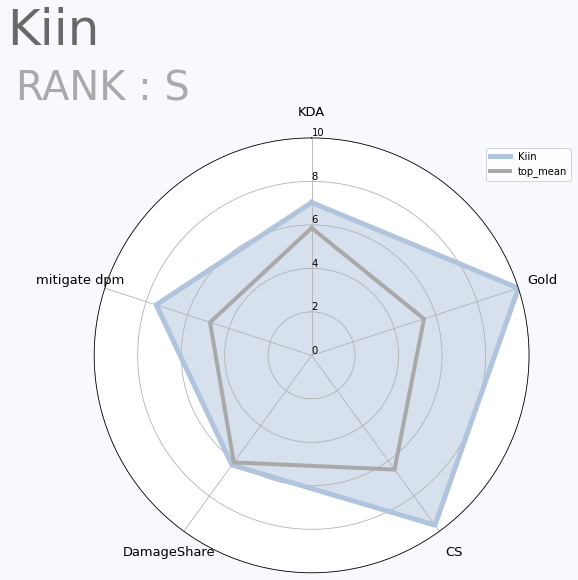

In [20]:
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 
top_list = top_player_df['playername']
jng_list = jng_player_df['playername']
mid_list = mid_player_df['playername']
bot_list = bot_player_df['playername']
sup_list = sup_player_df['playername']

lane = input("what lane?: ")
name = input("what name?: ")

lane_list = list()
if lane =='top': lane_list = top_list
elif lane=='jng': lane_list = jng_list
elif lane=='mid': lane_list = mid_list
elif lane=='bot': lane_list = bot_list
else: lane_list = sup_list

for player in lane_list:
  if player!=name: continue
  else:
    if lane=='top': 
      df = pd.DataFrame({
      'Playername': [player, 'top_mean'],
      'KDA': [top_player_df[top_player_df['playername']==player][top_player_df.columns[1]], top_player_df[top_player_df['playername']=='Mean'][top_player_df.columns[1]]],
      'Gold': [top_player_df[top_player_df['playername']==player][top_player_df.columns[2]],top_player_df[top_player_df['playername']=='Mean'][top_player_df.columns[2]]],
      'CS': [top_player_df[top_player_df['playername']==player][top_player_df.columns[3]],top_player_df[top_player_df['playername']=='Mean'][top_player_df.columns[3]]],
      'DamageShare': [top_player_df[top_player_df['playername']==player][top_player_df.columns[4]],top_player_df[top_player_df['playername']=='Mean'][top_player_df.columns[4]]],
      'mitigate dpm': [top_player_df[top_player_df['playername']==player][top_player_df.columns[5]],top_player_df[top_player_df['playername']=='Mean'][top_player_df.columns[5]]]
      })
      rank = top_player_df[top_player_df['playername']==name]['rank'].values
    elif lane=='jng':
      df = pd.DataFrame({
      'Playername': [player, 'jng_mean'],
      'KDA': [jng_player_df[jng_player_df['playername']==player][jng_player_df.columns[1]],jng_player_df[jng_player_df['playername']=='Mean'][jng_player_df.columns[1]]],
      'Gold' : [jng_player_df[jng_player_df['playername']==player][jng_player_df.columns[2]],jng_player_df[jng_player_df['playername']=='Mean'][jng_player_df.columns[2]]],
      'DamageShare': [jng_player_df[jng_player_df['playername']==player][jng_player_df.columns[3]],jng_player_df[jng_player_df['playername']=='Mean'][jng_player_df.columns[3]]],
      'CS': [jng_player_df[jng_player_df['playername']==player][jng_player_df.columns[4]],jng_player_df[jng_player_df['playername']=='Mean'][jng_player_df.columns[4]]],
      'Damagetochampions': [jng_player_df[jng_player_df['playername']==player][jng_player_df.columns[5]],jng_player_df[jng_player_df['playername']=='Mean'][jng_player_df.columns[5]]]
      })
      rank = jng_player_df[jng_player_df['playername']==name]['rank'].values
    elif lane=='mid':
      df = pd.DataFrame({
      'Playername': [player, 'mid_mean'],
      'KDA': [mid_player_df[mid_player_df['playername']==player][mid_player_df.columns[1]],mid_player_df[mid_player_df['playername']=='Mean'][mid_player_df.columns[1]]],
      'Gold': [mid_player_df[mid_player_df['playername']==player][mid_player_df.columns[2]],mid_player_df[mid_player_df['playername']=='Mean'][mid_player_df.columns[2]]],
      'CS': [mid_player_df[mid_player_df['playername']==player][mid_player_df.columns[3]],mid_player_df[mid_player_df['playername']=='Mean'][mid_player_df.columns[3]]],
      'DamageShare': [mid_player_df[mid_player_df['playername']==player][mid_player_df.columns[4]],mid_player_df[mid_player_df['playername']=='Mean'][mid_player_df.columns[4]]],
      'visionscore': [mid_player_df[mid_player_df['playername'] == player][mid_player_df.columns[5]],mid_player_df[mid_player_df['playername']=='Mean'][mid_player_df.columns[5]]]
      })
      rank = mid_player_df[mid_player_df['playername']==name]['rank'].values
    elif lane=='bot':
      df = pd.DataFrame({
      'Playername': [player, 'bot_mean'],
      'KDA': [bot_player_df[bot_player_df['playername']==player][bot_player_df.columns[1]],bot_player_df[bot_player_df['playername']=='Mean'][bot_player_df.columns[1]]],
      'total Gold': [bot_player_df[bot_player_df['playername']==player][bot_player_df.columns[2]],bot_player_df[bot_player_df['playername']=='Mean'][bot_player_df.columns[2]]],
      'total cs': [bot_player_df[bot_player_df['playername']==player][bot_player_df.columns[3]],bot_player_df[bot_player_df['playername']=='Mean'][bot_player_df.columns[3]]],
      'physical': [bot_player_df[bot_player_df['playername']==player][bot_player_df.columns[4]],bot_player_df[bot_player_df['playername']=='Mean'][bot_player_df.columns[4]]],
      'line_presence': [bot_player_df[bot_player_df['playername']==player][bot_player_df.columns[5]],bot_player_df[bot_player_df['playername']=='Mean'][bot_player_df.columns[5]]]
      })
      rank = bot_player_df[bot_player_df['playername']==name]['rank'].values
    else:
      df = pd.DataFrame({
      'Playername': [player, 'sup_mean'],
      'KDA': [sup_player_df[sup_player_df['playername']==player][sup_player_df.columns[1]],sup_player_df[sup_player_df['playername']=='Mean'][sup_player_df.columns[1]]],
      'Gold' : [sup_player_df[sup_player_df['playername']==player][sup_player_df.columns[2]],sup_player_df[sup_player_df['playername']=='Mean'][sup_player_df.columns[2]]],
      'DamageShare': [sup_player_df[sup_player_df['playername']==player][sup_player_df.columns[3]],sup_player_df[sup_player_df['playername']=='Mean'][sup_player_df.columns[3]]],
      'CS': [sup_player_df[sup_player_df['playername']==player][sup_player_df.columns[4]],sup_player_df[sup_player_df['playername']=='Mean'][sup_player_df.columns[4]]],
      'Damagetochampions': [sup_player_df[sup_player_df['playername']==player][sup_player_df.columns[5]],sup_player_df[sup_player_df['playername']=='Mean'][sup_player_df.columns[5]]]
      })
      rank = sup_player_df[sup_player_df['playername']==name]['rank'].values

  ## 하나로 합치기
  labels = df.columns[1:]
  num_labels = len(labels)
    
  angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
  angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
  my_palette = ['lightsteelblue', '#696969']
 
  fig = plt.figure(figsize=(8,8))
  fig.set_facecolor('white')
  ax = fig.add_subplot(polar=True)
  for i, row in df.iterrows():
    color = my_palette[i]
    data = df.iloc[i].drop('Playername').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10) ## 반지름 축 눈금 설정
    plt.ylim(0,10)

    if i==0:
      name = row.Playername
      ax.plot(angles, data, color=color, linewidth=5, linestyle='solid', label=row.Playername) ## 레이더 차트 출력
      ax.fill(angles, data, color=color, alpha=0.5) ## 도형 안쪽에 색을 채워준다.
    else:
      ax.plot(angles, data, color='darkgray', linewidth=4, linestyle='solid', label=row.Playername)

fig.set_facecolor('ghostwhite')
plt.title(name, size=20, color=color, x=-0.2, y=1.2, ha='left', fontsize=50)
plt.legend(loc=(0.9,0.9))
plt.suptitle('RANK : ' + list(rank)[0], size=20, color='darkgray',x=0, y=1.0, ha='left', fontsize=40)
plt.show()